In [101]:
## Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## **Feedparser**
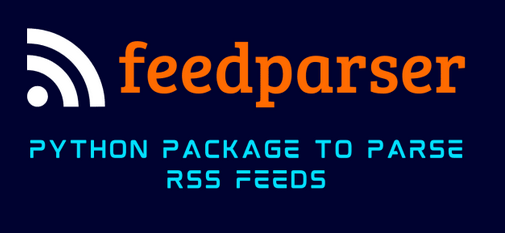

In [102]:
!pip install feedparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
## Using Feedparser library to fetch live RSS (Really Simple Syndication) feeds
import feedparser as fp

In [104]:
toi = fp.parse("https://timesofindia.indiatimes.com/rssfeedstopstories.cms")

In [107]:
toi.status

# Status Codes
# 1xx: Informational response - The request was received, continuing process
# 2xx: Successful - The request was successfully received, understood and accepted
# 3xx: Redirection - Further action needs to be taken in order to complete the request
# 4xx: Clint error - The request contains bad syntax or cannot be fulfilled
# 5xx: Server error - The server failed to fulfil an apparently valid request

200

In [105]:
toi.keys()

dict_keys(['bozo', 'entries', 'feed', 'headers', 'updated', 'updated_parsed', 'href', 'status', 'encoding', 'version', 'namespaces'])

In [106]:
toi.headers

{'last-modified': 'Tue, 28 Mar 2023 05:44:21 GMT',
 'server': 'Bhoot',
 'content-type': 'text/xml;charset=UTF-8',
 'content-msg': 'DATA_SERVED_FROM_CACHE',
 'content-language': 'en-IN',
 'x-cool': '70.174',
 'vary': 'Accept-Encoding',
 'content-encoding': 'gzip',
 'content-length': '8834',
 'cache-control': 'public, must-revalidate, max-age=306',
 'expires': 'Tue, 28 Mar 2023 06:00:40 GMT',
 'date': 'Tue, 28 Mar 2023 05:55:34 GMT',
 'connection': 'close',
 'content-security-policy': "frame-ancestors 'self' https://economictimes.indiatimes.com https://navbharattimes.indiatimes.com https://m.timesofindia.com https://m.economictimes.com https://gadgetsnow.com https://www.gadgetsnow.com https://www.google.com https://google.com https://static-toiimg-com.cdn.ampproject.org https://m-timesofindia-com.cdn.ampproject.org https://www.newspointapp.com https://timesofindia.indiatimes.com https://auto.timesofindia.com;",
 'access-control-max-age': '86400',
 'access-control-allow-credentials': 'fal

In [108]:
type(toi.entries)

list

In [109]:
len(toi.entries)

38

In [110]:
toi.entries

[{'title': "EPFO fixes 8.15% interest rate on employees' provident fund for 2022-23",
  'title_detail': {'type': 'text/plain',
   'language': 'en-IN',
   'base': 'https://timesofindia.indiatimes.com/rssfeedstopstories.cms',
   'value': "EPFO fixes 8.15% interest rate on employees' provident fund for 2022-23"},
  'summary': "The retirement fund body EPFO-Employees' Provident Fund Organization-has fixed 8.15% interest rate on employees' provident fund for 2022-23, PTI reported quoting sources on Tuesday.",
  'summary_detail': {'type': 'text/html',
   'language': 'en-IN',
   'base': 'https://timesofindia.indiatimes.com/rssfeedstopstories.cms',
   'value': "The retirement fund body EPFO-Employees' Provident Fund Organization-has fixed 8.15% interest rate on employees' provident fund for 2022-23, PTI reported quoting sources on Tuesday."},
  'links': [{'rel': 'alternate',
    'type': 'text/html',
    'href': 'https://timesofindia.indiatimes.com/business/india-business/epfo-interest-rate-emp

In [111]:
for entry in toi.entries:
    print(entry.title)

EPFO fixes 8.15% interest rate on employees' provident fund for 2022-23
Free all Amritpal aides in 24hrs: Akal Takht jathedar to Punjab govt
Who is UP's mafia-turned-neta Atiq Ahmed?
Greener pastures: Japan now the land of rising sons of India
Researchers unearth 2,000 ram heads in Egypt temple
Humza Yousaf to be 1st person of colour to lead Scotland
Prices of essential drugs set to increase from April
IT hiring to slow further as global banks turn cautious
Fast-­track courts clogged too, pendency up 40% in last 3yrs
IPL 2023 schedule: All matches time table, venues and groups
3.5x rise in high-Covid districts in two weeks
US-born Mongolian boy named 3rd highest spiritual leader
Amid Savarkar row, Uddhav snubs Cong, to skip key meet
Bombay Times launches 'Out & Proud @Work' campaign
Bribe case: Karnataka BJP MLA held after HC rejects bail
19% of taxpayers are govt staff, pensioners: Finance minister
K'taka quota rejig irks SC groups; BSY home attacked
SC frees 'juvenile' death convict 

In [112]:
toi.feed

{'language': 'en-gb',
 'links': [{'type': 'application/rss+xml',
   'rel': 'self',
   'href': 'https://timesofindia.indiatimes.com/rssfeedstopstories.cms'},
  {'rel': 'alternate',
   'type': 'text/html',
   'href': 'https://timesofindia.indiatimes.com'},
  {'type': 'application/rss+xml',
   'href': 'https://timesofindia.indiatimes.com/rssfeedstopstories.cms',
   'rel': 'alternate'}],
 'title': 'Times of India',
 'title_detail': {'type': 'text/plain',
  'language': 'en-IN',
  'base': 'https://timesofindia.indiatimes.com/rssfeedstopstories.cms',
  'value': 'Times of India'},
 'link': 'https://timesofindia.indiatimes.com',
 'subtitle': 'The Times of India: Breaking news, views, reviews, cricket from across India',
 'subtitle_detail': {'type': 'text/html',
  'language': 'en-IN',
  'base': 'https://timesofindia.indiatimes.com/rssfeedstopstories.cms',
  'value': 'The Times of India: Breaking news, views, reviews, cricket from across India'},
 'rights': 'Copyright:(C) 2023 Bennett Coleman Co.

In [113]:
## List comprisensan
df1 = [x['title'] for x in toi['entries']]

In [114]:
''.join([x['title'] for x in toi['entries']])

"EPFO fixes 8.15% interest rate on employees' provident fund for 2022-23Free all Amritpal aides in 24hrs: Akal Takht jathedar to Punjab govtWho is UP's mafia-turned-neta Atiq Ahmed?Greener pastures: Japan now the land of rising sons of IndiaResearchers unearth 2,000 ram heads in Egypt templeHumza Yousaf to be 1st person of colour to lead ScotlandPrices of essential drugs set to increase from AprilIT hiring to slow further as global banks turn cautiousFast-\xadtrack courts clogged too, pendency up 40% in last 3yrsIPL 2023 schedule: All matches time table, venues and groups3.5x rise in high-Covid districts in two weeksUS-born Mongolian boy named 3rd highest spiritual leaderAmid Savarkar row, Uddhav snubs Cong, to skip key meetBombay Times launches 'Out & Proud @Work' campaignBribe case: Karnataka BJP MLA held after HC rejects bail19% of taxpayers are govt staff, pensioners: Finance ministerK'taka quota rejig irks SC groups; BSY home attackedSC frees 'juvenile' death convict after 28 year

In [115]:
df1= pd.DataFrame(toi.entries)
df1.head(4)

,title,title_detail,summary,summary_detail,links,link,id,guidislink,published,published_parsed,authors,author,author_detail
0,EPFO fixes 8.15% interest rate on employees' p...,"{'type': 'text/plain', 'language': 'en-IN', 'b...",The retirement fund body EPFO-Employees' Provi...,"{'type': 'text/html', 'language': 'en-IN', 'ba...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://timesofindia.indiatimes.com/business/i...,https://timesofindia.indiatimes.com/business/i...,False,"Tue, 28 Mar 2023 10:18:52 +0530","(2023, 3, 28, 4, 48, 52, 1, 87, 0)",[{'name': 'TIMESOFINDIA.COM'}],TIMESOFINDIA.COM,{'name': 'TIMESOFINDIA.COM'}
1,Free all Amritpal aides in 24hrs: Akal Takht j...,"{'type': 'text/plain', 'language': 'en-IN', 'b...",The Akal Takht jathedar on Monday presided ove...,"{'type': 'text/html', 'language': 'en-IN', 'ba...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://timesofindia.indiatimes.com/city/amrit...,https://timesofindia.indiatimes.com/city/amrit...,False,"Tue, 28 Mar 2023 04:22:35 +0530","(2023, 3, 27, 22, 52, 35, 0, 86, 0)",[{'name': 'TNN'}],TNN,{'name': 'TNN'}
2,Who is UP's mafia-turned-neta Atiq Ahmed?,"{'type': 'text/plain', 'language': 'en-IN', 'b...","Atiq Ahmad (62), a mafia don-turned-politician...","{'type': 'text/html', 'language': 'en-IN', 'ba...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://timesofindia.indiatimes.com/city/allah...,https://timesofindia.indiatimes.com/city/allah...,False,"Tue, 28 Mar 2023 09:29:23 +0530","(2023, 3, 28, 3, 59, 23, 1, 87, 0)",[{'name': 'TIMESOFINDIA.COM'}],TIMESOFINDIA.COM,{'name': 'TIMESOFINDIA.COM'}
3,Greener pastures: Japan now the land of rising...,"{'type': 'text/plain', 'language': 'en-IN', 'b...",,"{'type': 'text/html', 'language': 'en-IN', 'ba...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://timesofindia.indiatimes.com/india/gree...,https://timesofindia.indiatimes.com/india/gree...,False,"Tue, 28 Mar 2023 05:31:38 +0530","(2023, 3, 28, 0, 1, 38, 1, 87, 0)",[{'name': 'HEMALI CHHAPIA'}],HEMALI CHHAPIA,{'name': 'HEMALI CHHAPIA'}


In [116]:
df1.columns

Index(['title', 'title_detail', 'summary', 'summary_detail', 'links', 'link',
       'id', 'guidislink', 'published', 'published_parsed', 'authors',
       'author', 'author_detail'],
      dtype='object')

In [117]:
## To save the file 
df1.to_csv('toi.csv')

## **Beautiful Soup**
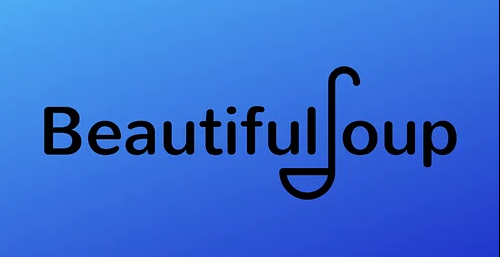


In [118]:
import requests
from bs4 import BeautifulSoup

In [119]:
url = ('https://www.gadgetsnow.com/slideshows/chatgpt-4-launched-microsoft-brings-ai-to-office-365-more-job-cuts-at-facebook-and-other-top-tech-news-of-the-week/photolist/98761535.cms?picid=98761539')

In [120]:
r = requests.get(url)

In [121]:
r.status_code

# Status Codes
# 1xx: Informational response - The request was received, continuing process
# 2xx: Successful - The request was successfully received, understood and accepted
# 3xx: Redirection - Further action needs to be taken in order to complete the request
# 4xx: Clint error - The request contains bad syntax or cannot be fulfilled
# 5xx: Server error - The server failed to fulfil an apparently valid request

200

In [122]:
html_doc= r.text
print(html_doc)

<!doctype html><html class="no-js" lang="en"><head><meta charSet="utf-8"/><meta http-equiv="x-ua-compatible" content="ie=edge"/><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5.0"/><meta content="en" http-equiv="content-language"/><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"/><meta content="true" name="HandheldFriendly"/><meta content="width" name="MobileOptimized"/><meta name="mobile-web-app-capable" content="yes"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/><meta content="Gadgets Now" property="og:site_name"/><meta name="twitter:card" content="summary_large_image"/><meta name="twitter:site" content="@gadgetsnow"/><meta property="og:image:width" content="1070"/><meta property="og:image:height" content="580"/><meta content="#135394" name="theme-color"/><link rel="shortcut icon" href="https://www.gadgetsnow.com/icons/favicon2.ico" type="image/x-icon"/><l

In [123]:
soup = BeautifulSoup(html_doc,'lxml')

In [124]:
print(soup.title.string)

ChatGPT-4 launched, Microsoft brings AI to Office 365, more job cuts at Facebook, and other top tech news of the week | Gadgets Now


In [125]:
h2_tag= soup.find_all('h2')
len(h2_tag)

15

In [126]:
h2_tag

[<h2 class="oa3eh">Microsoft funded-OpenAI introduces ChatGPT 4</h2>,
 <h2 class="oa3eh">Microsoft brings AI to Word, Excel, PowerPoint, and more with Copilot 365</h2>,
 <h2 class="oa3eh">​&lt;strong&gt;Google removes YouTube ban on Donald Trump &lt;/strong&gt;​</h2>,
 <h2 class="oa3eh">Facebook-parent Meta cuts 10,000 more jobs</h2>,
 <h2 class="oa3eh">Samsung launches Galaxy A54 5G, Galaxy A34 5G in India​</h2>,
 <h2 class="oa3eh">Oppo launches,Find N2 Flip, its first-ever foldable phone in India</h2>,
 <h2 class="oa3eh">Redmi Smart TV with Fire TV debuts in India, priced under Rs 15,000</h2>,
 <h2 class="oa3eh">​&lt;strong&gt;Poco X5 5G launched in India at Rs 18,999&lt;/strong&gt;​</h2>,
 <h2 class="oa3eh">Airtel offers unlimited 5G data for free</h2>,
 <h2 class="oa3eh">​&lt;strong&gt;Qualcomm Snapdragon 7+ Gen 2 goes official&lt;/strong&gt;​</h2>,
 <h2 class="oa3eh">US government asks China’s Bytedance to sell TikTok</h2>,
 <h2 class="oa3eh">Google releases March Pixel Feature Dr

In [127]:
for title in h2_tag:
    print(title.text)

Microsoft funded-OpenAI introduces ChatGPT 4
Microsoft brings AI to Word, Excel, PowerPoint, and more with Copilot 365
​<strong>Google removes YouTube ban on Donald Trump </strong>​
Facebook-parent Meta cuts 10,000 more jobs
Samsung launches Galaxy A54 5G, Galaxy A34 5G in India​
Oppo launches,Find N2 Flip, its first-ever foldable phone in India
Redmi Smart TV with Fire TV debuts in India, priced under Rs 15,000
​<strong>Poco X5 5G launched in India at Rs 18,999</strong>​
Airtel offers unlimited 5G data for free
​<strong>Qualcomm Snapdragon 7+ Gen 2 goes official</strong>​
US government asks China’s Bytedance to sell TikTok
Google releases March Pixel Feature Drop
Related Articles
visual stories
TRENDING Stroies


In [128]:
df = pd.DataFrame({'Headline': h2_tag})
print(df)

                                             Headline
0      [Microsoft funded-OpenAI introduces ChatGPT 4]
1   [Microsoft brings AI to Word, Excel, PowerPoin...
2   [​<strong>Google removes YouTube ban on Donald...
3        [Facebook-parent Meta cuts 10,000 more jobs]
4   [Samsung launches Galaxy A54 5G, Galaxy A34 5G...
5   [Oppo launches,Find N2 Flip, its first-ever fo...
6   [Redmi Smart TV with Fire TV debuts in India, ...
7   [​<strong>Poco X5 5G launched in India at Rs 1...
8          [Airtel offers unlimited 5G data for free]
9   [​<strong>Qualcomm Snapdragon 7+ Gen 2 goes of...
10  [US government asks China’s Bytedance to sell ...
11         [Google releases March Pixel Feature Drop]
12                                 [Related Articles]
13                                   [visual stories]
14                                 [TRENDING Stroies]


In [129]:
p_tags= soup.find_all('p')
len(p_tags)

14

In [130]:
for p in p_tags:
    print(p.text)

Gadgets Now | Gadgets Now Bureau19 Mar, 2023, 02:02PM IST
This week, the industry was abuzz with AI. OpenAI introduced the new GPT-4 language model, powering its chatbot, ChatGPT-4, and Microsoft's Bing search engine. That is not all; Microsoft is bringing AI to productivity apps with Copilot 365. In other news, Meta, the parent company of Facebook, announced another job cut, sacking 10,000 more employees. The week also saw some new launches, with Oppo Find N2 Flip, Poco X5, Samsung's Galaxy A54 5G, A34 5G, and more coming to India. This and more in top tech news of the week.
OpenAI has introduced the ChatGPT-4, the most advanced system from the company, said to be more creative, collaborative, and accurate than ever. Read more about ChatGPT-4.
Microsoft has announced Copilot 365 for its suite of productivity apps, an AI-powered tool powered by GPT-4 from OpenAI, designed to help users generate documents, emails, presentations, and more in Microsoft 365 apps. Copilot is integrated into